In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import os

In [2]:
input_data = pd.read_csv("Inputs.csv")
labelencoder = LabelEncoder()
input_data["FaultType"] = labelencoder.fit_transform(input_data["FaultType"])

In [3]:
def extract(RSN):
    filter_ = input_data["RSN"] == int(RSN)
    filtered = input_data.where(filter_).dropna()
    return filtered.iloc[0,2:].values

In [4]:
X = []
y = []
rsn_list = []
for f in os.listdir("fouriers"):
    RSN = f.split("_")[0][3:]
    if RSN not in rsn_list:
        try:
            extracted = extract(RSN)
        except:
            print(f,RSN)
        X.append(extracted)
        y.append(np.loadtxt(os.path.join("fouriers",f)))
        rsn_list.append(RSN)

RSN11605_40139808_BKPKDHHE.txt 11605
RSN11640_51183708_BKPKDHLE.txt 11640


In [5]:
X = np.array(X)
y = np.array(y)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x = np.array(ct.fit_transform(X))


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann.add(tf.keras.layers.Dense(units=2,activation="relu"))
ann.add(tf.keras.layers.Dense(units=len(y[0])))
ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x_train,y_train,batch_size=32,epochs=100)

In [12]:
y_pred = ann.predict(x_test)

0.0002554156131334977 0.00012840037407912844


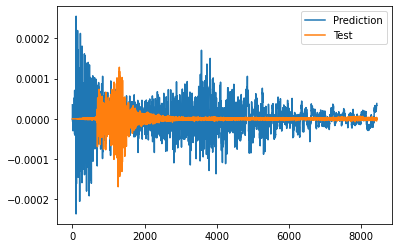

In [26]:
import matplotlib.pyplot as plt
ind = 0
acc_pred = np.real(np.fft.ifft(y_pred[ind])[:8442])
acc_test = np.real(np.fft.ifft(y_test[ind])[:8442])
print(max(acc_pred),max(acc_test))
plt.plot(acc_pred,label="Prediction")
plt.plot(acc_test,label="Test")
plt.legend()
plt.show()
plt.close()

In [30]:
np.max(y_pred,axis=1)

array([0.08071971, 0.11907721, 0.09811783, ..., 0.10438716, 0.10514045,
       0.10495925], dtype=float32)